<a href="https://colab.research.google.com/github/DmitryKutsev/DeepHW/blob/master/hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from math import e
from sklearn.metrics import classification_report

import torch
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision import transforms

import matplotlib.pyplot as plt

from tqdm import tqdm

from sklearn.metrics import accuracy_score

import time

In [2]:

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

In [3]:

train_dataset = MNIST('.', train=True, download=True, transform=transform)
test_dataset = MNIST('.', train=False, transform=transform)

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw
Processing...



Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [4]:
train_dataset.data = train_dataset.data[(train_dataset.targets == 3) | (train_dataset.targets == 7)]
train_dataset.targets = train_dataset.targets[(train_dataset.targets == 3) | (train_dataset.targets == 7)]

test_dataset.data = test_dataset.data[(test_dataset.targets == 3) | (test_dataset.targets == 7)]
test_dataset.targets = test_dataset.targets[(test_dataset.targets == 3) | (test_dataset.targets == 7)]

train_dataset.targets = (train_dataset.targets == 7).long()
test_dataset.targets = (test_dataset.targets == 7).long()
#what is .long()?

In [5]:
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

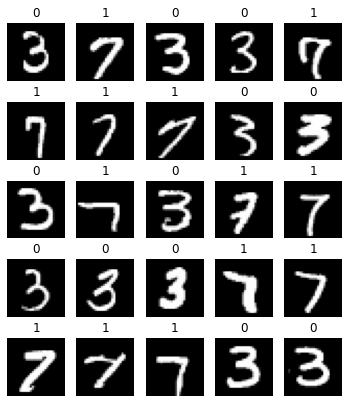

In [6]:
X, y = next(iter(train_loader))
X = X.numpy()
y = y.numpy()

plt.figure(figsize=(6, 7))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X[i].reshape(28, 28), cmap=plt.cm.Greys_r)
    plt.title(y[i])
    plt.axis('off')

In [7]:
for x, y in train_loader:
    break

In [8]:
x.shape

torch.Size([128, 1, 28, 28])

In [9]:
x.view(x.shape[0], -1).numpy().shape

(128, 784)

In [10]:

for x, y in train_loader:
    x = x.view(x.shape[0], -1).numpy()
    y = y.numpy()
    break

In [11]:

# количество эпох - полных проходов по датасету
epochs = 3

for n_epoch in range(epochs):
    
    dataset_passed_samples = 0
    
    for x, y in train_loader:
        
        # вот здесь мы могли бы как-то манипулировать с данными
        # например, учить, но пока этого делать не будет
        # только демонстрация
        
        time.sleep(0.05)
        
        dataset_passed_samples += x.shape[0]
        
        dataset_passed_percent = dataset_passed_samples * 100 / train_loader.dataset.data.shape[0]
        
        print(f'Эпоха - {n_epoch + 1}, прошли - {dataset_passed_percent:.2f} % датасета', end='\r')
        
    print('\r')

Эпоха - 1, прошли - 100.00 % датасета
Эпоха - 2, прошли - 100.00 % датасета
Эпоха - 3, прошли - 100.00 % датасета


In [12]:
# таким образом мы создаем матрицу 64 на 512 с рандомными значениями
x = np.random.rand(64, 512)
x

array([[0.02985523, 0.49481437, 0.09555917, ..., 0.76585943, 0.01128554,
        0.23499294],
       [0.90019537, 0.0091655 , 0.24465949, ..., 0.37382022, 0.09811704,
        0.00714866],
       [0.86572842, 0.55911628, 0.02091923, ..., 0.29595122, 0.34516211,
        0.65041541],
       ...,
       [0.29693344, 0.27898124, 0.90633774, ..., 0.69239156, 0.643818  ,
        0.61531992],
       [0.72245298, 0.05079982, 0.81575928, ..., 0.35930994, 0.89627771,
        0.26190604],
       [0.19054639, 0.64617109, 0.54463863, ..., 0.84981714, 0.85533502,
        0.58372335]])

In [13]:
# большинство функций применяются к каждому элементу массива
# здесь мы каждый элемент массива возвели в квадрат и прибавили к получившемуся значению логарифм элемента матрицы 
x ** 2 + np.log(x)

array([[-3.51050383, -0.45873134, -2.33887808, ...,  0.31978404,
        -4.48410555, -1.39297812],
       [ 0.70520823, -4.69222476, -1.34802959, ..., -0.84423874,
        -2.31196722, -4.94077916],
       [ 0.60530168, -0.26878679, -3.86664903, ..., -1.1299735 ,
        -0.9446042 , -0.00710382],
       ...,
       [-1.1260778 , -1.19878021,  0.72310483, ...,  0.11180244,
        -0.02583757, -0.10699435],
       [ 0.19683538, -2.97728176,  0.46182723, ..., -0.89446629,
         0.69380877, -1.27117469],
       [-1.62155169, -0.01915388, -0.31100154, ...,  0.55945508,
         0.57533594, -0.19759517]])

In [14]:
y = np.random.rand(512, 1024)
# скалярное произведение
res = np.dot(x, y)

In [15]:
res.shape == (x.shape[0], y.shape[1])

True

In [16]:
x.shape

(64, 512)

In [17]:
res.shape

(64, 1024)

In [18]:
# x = np.random.rand(64, 512)
# y = np.random.rand(512, 1024)

In [19]:

# res.shape == (x.shape[0], y.shape[1])

In [20]:
# x = np.random.rand(64, 512)
# y = np.random.rand(512, 1024)


# for x, y in train_loader:
#     x = x.view(x.shape[0], -1).numpy()
#     y = y.numpy()
#     break


In [34]:
# y = np.random.rand(512, 1024)
# x = np.random.rand(64, 512)

learning_rate = 0.01
epochs = 3

w1 = 0.5
b1 = 0.01
w2 = 0.7
b2 = 0.001

loss_func = 0

losses = []

for n_epoch in range(epochs):
    
    print(f'Epoch: {n_epoch + 1}')
    
    for x, y in train_loader:
        
        x = x.view(x.shape[0], -1).numpy()
        y = np.expand_dims(y.numpy(), 1)


        func1 = x*w1 + b1
        func1 = np.tanh(func1)

        func2 = func1*w2 + b2
        func2 = np.tanh(func2)
                
        # forward
        
        # рассчет bce
        # не забудьте добавить это значение в массив losses

        my_y = 1/(1 + np.exp(-func2))
        #loss = -np.summ(y*np.log(func2) + (1-y)*np.log(1-func2))/len(train_loader)
        loss = -np.mean(y*np.log(func2) + (1-y)*np.log(1-func2))
        losses.append(loss)
          
        # backward
        
        
        # gradient descent

Epoch: 1
Epoch: 2
Epoch: 3


In [ ]:
fun = x*w1 + b1



In [ ]:
fun = np.tanh(fun)

In [ ]:
fun

In [ ]:

fun = 1/(1 + np.exp(-fun))
fun

In [32]:
1/(1 + np.exp(-x)).reshape(-1)[-1]

0.3955090626680839

In [37]:
my_y.reshape(-1)[-1]

0.46562955

In [38]:
func2

array([[-0.13769889, -0.13769889, -0.13769889, ..., -0.13769889,
        -0.13769889, -0.13769889],
       [-0.13769889, -0.13769889, -0.13769889, ..., -0.13769889,
        -0.13769889, -0.13769889],
       [-0.13769889, -0.13769889, -0.13769889, ..., -0.13769889,
        -0.13769889, -0.13769889],
       ...,
       [-0.13769889, -0.13769889, -0.13769889, ..., -0.13769889,
        -0.13769889, -0.13769889],
       [-0.13769889, -0.13769889, -0.13769889, ..., -0.13769889,
        -0.13769889, -0.13769889],
       [-0.13769889, -0.13769889, -0.13769889, ..., -0.13769889,
        -0.13769889, -0.13769889]], dtype=float32)

In [43]:
func2 = func1*w2 + b2
func2 = 1/(1 + np.exp(-func2)) 
func2
loss = -np.sum(y*np.log(func2) + (1-y)*np.log(1-func2))

In [54]:
loss = -np.mean(y*np.log(func2) + (1-y)*np.log(1-func2))
loss


0.7071332857333045

In [47]:
loss = y*np.log(func2) + (1-np.expand_dims(y, 1))*np.log(1-func2)